### The Spark Foundation - GRIP Task #6

- Create the Decision Tree classifier and visualize it graphically.
- The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

Dataset : https://bit.ly/3kXTdox (iris data set)

In [1]:
import pandas as pd      #importing libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from scikitplot.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
iris = load_iris()

In [3]:
iris_df= pd.DataFrame(iris.data,columns=iris.feature_names) #loading dataset to dataframe from iris bunch
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
dir(iris) #directory information for the object

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
X=iris_df
y=iris.target #have values in 0, 1 or 2 as per the species type

In [6]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
tree1 = DecisionTreeClassifier(criterion='gini', 
                               max_depth=None,
                               min_samples_split=2,
                               max_features=None,
                               max_leaf_nodes=None,)
tree1.fit(X_train,y_train)

DecisionTreeClassifier()

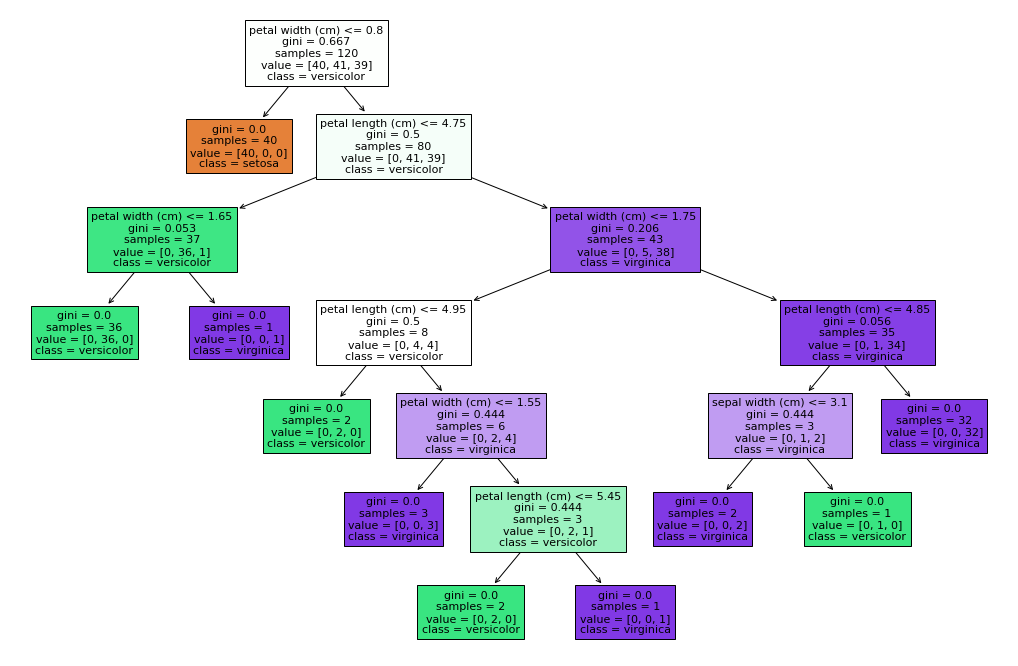

In [9]:
plt.figure(figsize=(18,12))  
tree.plot_tree(decision_tree = tree1,
               class_names=iris.target_names, 
               filled = True, 
               label = 'all',
               feature_names=iris.feature_names)
plt.show()

In [10]:
y_pred = tree1.predict(X_test)

In [11]:
accuracy_score(y_test,y_pred)

1.0

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

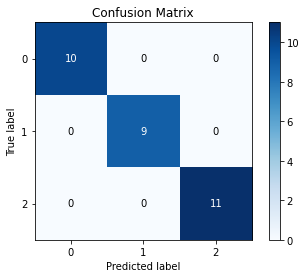

In [12]:
plot_confusion_matrix(y_test,y_pred)

In [13]:
iris.target_names       #target classes in the iris data bunch

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [14]:
tree1.predict_proba([[6.3,2.5,5,1.9]]) #100% probablity for virginica at [[6.3,2.5,5,1.9]] as input args
#here since the max_depth was set to be None, the Decision tree splits upto pure leaf nodes and attain 100% probablity

array([[0., 0., 1.]])

In [15]:
y_pred1 = tree1.predict([[6.3,2.5,5,1.9]])
iris.target_names[y_pred1]

array(['virginica'], dtype='<U10')

In [16]:
y1 = tree1.predict([[5,3,3.5,5],
                    [2,3,2.5,1.6],
                    [4,2.1,2.3,0.6],
                    [3,4.5,2.65,3.2]])
iris.target_names[y1]                    #results for multiple entries

array(['virginica', 'versicolor', 'setosa', 'virginica'], dtype='<U10')